In [ ]:
%%capture
!git clone https://github.com/AlexeyAB/darknet
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!/usr/local/cuda/bin/nvcc --version
!make
!apt-get install tree

In [ ]:
%%capture
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

In [ ]:
%%capture
!wget https://www.dropbox.com/s/pgy5ps3clel2p4b/celldataset.zip?dl=1 -O celldataset.zip
!unzip celldataset.zip

In [ ]:
!tree celldataset -L 2 -C

celldataset
├── classes.data
├── classes.names
├── test
│   ├── annotations
│   └── images
├── test.cfg
├── test.txt
├── train
│   ├── annotations
│   └── images
├── train.cfg
└── train.txt

6 directories, 6 files


In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def mostrarImagen(imagePath):
  image = cv2.imread(imagePath)
  if len(image.shape)==3:
    img2 = image[:,:,::-1]
    plt.imshow(img2)
    plt.show()
  else:
    img2 = image
    plt.imshow(img2,cmap='gray')
    plt.show()

def mostrarImagenConAnotacion(imagePath,annotationPath,classesPath):
    image = cv2.imread(imagePath)
    (H,W)=image.shape[:2]
    with open(annotationPath) as f:
        lines = f.readlines()
    with open(classesPath) as f:
        clases = f.readlines()
    for annot in lines:
        (c,x,y,w,h) = annot.split(' ')
        cv2.rectangle(image,(int((float(x)-float(w)/2)*W),int((float(y)-float(h)/2)*H)),(int((float(x)+float(w)/2)*W),int((float(y)+float(h)/2)*H)),(0,255,0),10)
        cv2.putText(image,clases[int(c)],(int((float(x)-float(w)/2)*W),int((float(y)-float(h)/2)*H-2)),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0),1)
    img2 = image[:,:,::-1]
    plt.imshow(img2)
    plt.show()


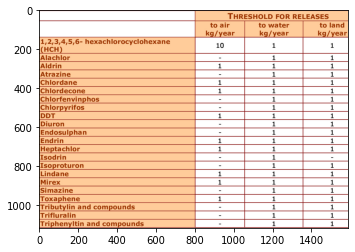

In [ ]:
mostrarImagen('celldataset/train/images/eu-001-2-4.jpg')

In [ ]:
#!cat celldataset/train/yolo/eu-001-2-4.txt

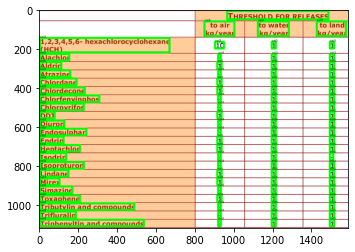

In [ ]:
mostrarImagenConAnotacion('celldataset/train/images/eu-001-2-4.jpg','celldataset/train/images/eu-001-2-4.txt','celldataset/classes.names')

In [ ]:
!cat celldataset/classes.names

cell

In [ ]:
#!cat celldataset/train.txt

In [ ]:
#!cat celldataset/train.cfg

In [ ]:
!cat celldataset/classes.data

classes = 1
train  = /content/darknet/celldataset/train.txt
valid  = /content/darknet/celldataset/test.txt
names = /content/darknet/celldataset/classes.names
backup = /content/darknet/backup

In [ ]:
%%capture
!./darknet detector train celldataset/classes.data celldataset/train.cfg yolov4.conv.137 -dont_show

In [ ]:
%%capture
!./darknet detector test celldataset/classes.data celldataset/test.cfg backup/train_last.weights celldataset/train/images/eu-001-2-4.jpg

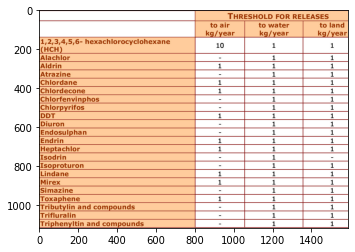

In [ ]:
mostrarImagen('predictions.jpg')